In [ ]:
import pandas as pd 
data = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/mergedTratado.csv", delimiter = ',',  index_col=0)
data_17_18 = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/1718tratado.csv", delimiter = ',',  index_col=0)
data_18_19 = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/1819tratado.csv", delimiter = ',',  index_col=0)
data_19_20 = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/1920tratado.csv", delimiter = ',',  index_col=0)

data.head()

In [ ]:
colunas_numericas = data.select_dtypes(include=[float, int])

# Calcule a correlação entre as variáveis numéricas e a variável alvo
correlacao = colunas_numericas.corrwith(data['value'])

# Criar uma lista para armazenar as colunas a serem removidas
colunas_removidas = []

for coluna in colunas_numericas.columns:
    correlacao_valor = correlacao[coluna]
    #print(f"Coluna: {coluna}, Correlação: {correlacao_valor}")
    
    # Verificar se a correlação é negativa
    if correlacao_valor < 0.2:
        colunas_removidas.append(coluna)

# Remover as colunas com correlação negativa do DataFrame
data = data.drop(colunas_removidas, axis=1)

In [24]:
# Definir o número de bins desejado
num_bins = 3

# Realizar equal-height binning na coluna 'value'
data['bin'] = pd.qcut(data['value'], num_bins, labels=False)

# Obter a contagem de valores em cada bin
bin_counts = data['bin'].value_counts().sort_index()

# Obter os intervalos de valores dos bins
bin_intervals = pd.qcut(data['value'], num_bins, retbins=True)[1]

# Exibir os intervalos de valores dos bins
for i in range(num_bins):
    print(f'Bin {i+1}: {bin_intervals[i]} - {bin_intervals[i+1]}')


Bin 1: 100.0 - 2000000.0
Bin 2: 2000000.0 - 9000000.0
Bin 3: 9000000.0 - 180000000.0


In [25]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: ['nationality', 'position', 'position2', 'foot', 'league']


In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


dropped = data.drop(['value','bin',], axis=1)

# Select the relevant features and target variable
features_scale = dropped.drop([ 'nationality', 'position', 'position2', 'foot', 'league'], axis=1)
features_encode = dropped[[ 'nationality', 'position', 'position2', 'foot', 'league']]
target = data['bin']

# Preprocess the scaled features
scaled_features = features_scale.apply(pd.to_numeric, errors='coerce').values
scaled_features = np.nan_to_num(scaled_features)

# One-hot encode the categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features_encode).toarray()

# Concatenate the scaled features and encoded features
features = np.concatenate((scaled_features, encoded_features), axis=1)

data.head()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

accuracy: 64.11%
Matriz de Confusão:


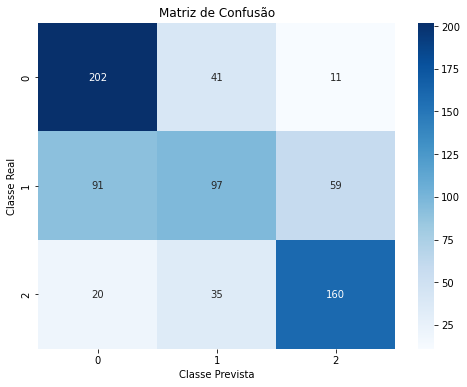

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt





# Criar o modelo de regressão logística
model = LogisticRegression(max_iter=1000,solver='liblinear')

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
#print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()
